In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
dataset=pd.read_csv('/content/drive/MyDrive/Projects/emmisions_clustering/clustered_data.csv')

print(dataset.shape)

(36733, 13)


In [3]:
dataset.head()

,Unnamed: 0,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,CLUSTER
0,0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952,1
1,1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377,1
2,2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776,1
3,3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505,1
4,4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028,1


In [4]:
dataset = dataset.drop(['Unnamed: 0','CO','NOX'],axis=1)
dataset.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CLUSTER
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,1
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,1
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,1
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,1
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,1


## Handling Imbalanced Dataset

In [5]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [6]:
X = dataset.drop('CLUSTER',axis=1)
y = dataset['CLUSTER']

In [7]:
from collections import Counter

In [8]:
os=SMOTE()
X_ns,y_ns=os.fit_resample(X,y)
print("The number of classes before fit {}".format(Counter(y)))
print("The number of classes after fit {}".format(Counter(y_ns)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


The number of classes before fit Counter({0: 24202, 1: 10728, 2: 1803})
The number of classes after fit Counter({1: 24202, 0: 24202, 2: 24202})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


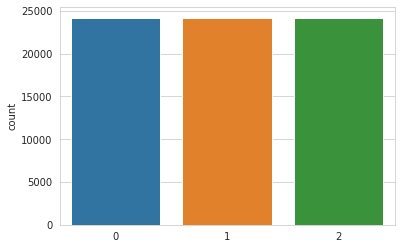

In [9]:
sns.set_style('whitegrid')
sns.countplot(y_ns)

In [10]:
X_ns.shape

(72606, 9)

In [11]:
sampled_dataset = pd.DataFrame(X_ns,columns=dataset.drop('CLUSTER',axis=1).columns)

In [12]:
sampled_dataset['CLUSTER'] = y_ns

In [13]:
sampled_dataset.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CLUSTER
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,1
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,1
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,1
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,1
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,1


In [14]:
sampled_dataset.shape

(72606, 10)

## Handling the outliers

### Using IQR

In [16]:
continuous_feature = X.columns

In [29]:
lower_limit,upper_limit = [],[]
for feature in continuous_feature:
  Q1 = sampled_dataset[feature].quantile(0.25)
  Q3 = sampled_dataset[feature].quantile(0.75)
  IQR = Q3 - Q1
  lower_limit_val = Q1 - 1.5*IQR
  upper_limit_val = Q3 + 1.5*IQR
  lower_limit.append(lower_limit_val), upper_limit.append(upper_limit_val)
  print(feature,IQR,Q1, Q3)

AT 10.476521242145587 8.967930169169229 19.444451411314816
AP 9.591305234396714 1009.5797639505898 1019.1710691849865
AH 18.141546274916905 72.4646258759385 90.6061721508554
AFDP 1.2677999999999998 2.9301 4.1979
GTEP 6.236779520189817 19.602970479810182 25.83975
TIT 40.09072557778131 1050.6092744222187 1090.7
TAT 8.338079558279674 541.6446737429202 549.9827533011999
TEY 24.065990117827994 110.64528897004325 134.71127908787125
CDP 1.6510000000000016 10.508 12.159


In [18]:
print(lower_limit,'\n',upper_limit)

[-6.746851694049152, 995.1928060989948, 45.25230646356314, 1.0284000000000002, 10.247801199525457, 990.4731860555468, 529.1375544055006, 74.54630379330126, 8.031499999999998] 
 [35.15923327453319, 1033.5580270365817, 117.81849156323076, 6.0996, 35.19491928028472, 1150.836088366672, 562.4898726386193, 170.81026426461324, 14.635500000000004]


In [23]:
outlier_dataset = sampled_dataset.copy()

In [24]:
no_outlier_list = []
i = 0
for feature in continuous_feature:
  outlier_dataset = outlier_dataset[(outlier_dataset[feature]>lower_limit[i])&(outlier_dataset[feature]<upper_limit[i])]
  print(feature,len(outlier_dataset))
  i+=1

AT 72596
AP 72241
AH 71111
AFDP 70776
GTEP 70623
TIT 70623
TAT 68214
TEY 68214
CDP 68214


In [25]:
outlier_dataset.shape

(68214, 10)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


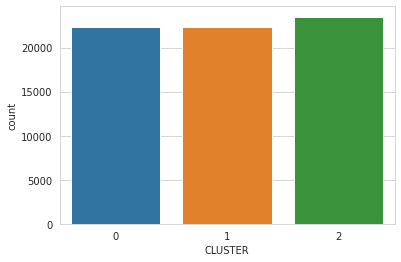

In [26]:
sns.set_style('whitegrid')
sns.countplot(outlier_dataset['CLUSTER'])

In [30]:
lower_limit_2,upper_limit_2 = [],[]
for feature in continuous_feature:
  Q1 = outlier_dataset[feature].quantile(0.25)
  Q3 = outlier_dataset[feature].quantile(0.75)
  IQR = Q3 - Q1
  lower_limit_val = Q1 - 1.5*IQR
  upper_limit_val = Q3 + 1.5*IQR
  lower_limit_2.append(lower_limit_val),upper_limit_2.append(upper_limit_val)
  print(feature,IQR,Q1, Q3)

AT 10.299445202509968 9.11841383242696 19.417859034936928
AP 9.564637194473448 1009.5116804302015 1019.076317624675
AH 17.486416122383545 73.327 90.81341612238354
AFDP 1.2639281179241673 2.884571882075833 4.1485
GTEP 6.031358254116281 19.51564174588372 25.547
TIT 39.037189118021615 1050.1628108819784 1089.2
TAT 7.234963900841876 542.7550360991581 549.99
TEY 23.997812524611575 110.43775592232238 134.43556844693396
CDP 1.5929999999999982 10.494000000000002 12.087


In [31]:
for i in range(len(lower_limit)):
  print(lower_limit[i],lower_limit_2[i])
  print(upper_limit[i],upper_limit_2[i],'\n')

-6.746851694049152 -6.330753971337993
35.15923327453319 34.86702683870188 

995.1928060989948 995.1647246384914
1033.5580270365817 1033.4232734163852 

45.25230646356314 47.09737581642468
117.81849156323076 117.04304030595887 

1.0284000000000002 0.9886797051895821
6.0996 6.044392176886252 

10.247801199525457 10.468604364709298
35.19491928028472 34.594037381174424 

990.4731860555468 991.607027204946
1150.836088366672 1147.7557836770325 

529.1375544055006 531.9025902478953
562.4898726386193 560.8424458512628 

74.54630379330126 74.44103713540503
170.81026426461324 170.43228723385133 

8.031499999999998 8.104500000000005
14.635500000000004 14.476499999999998 




AT



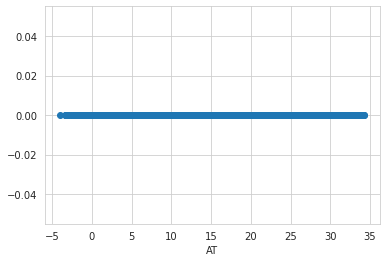


AP



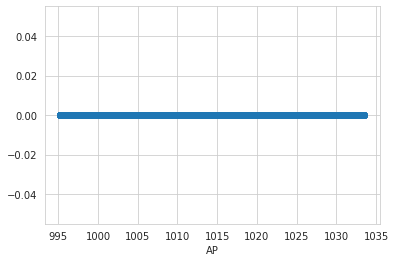


AH



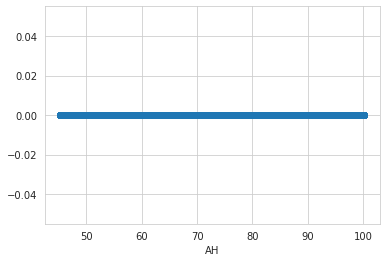


AFDP



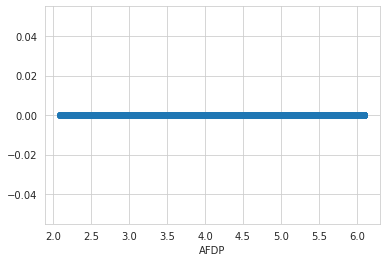


GTEP



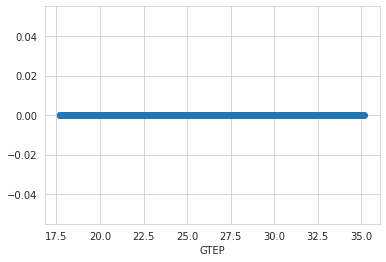


TIT



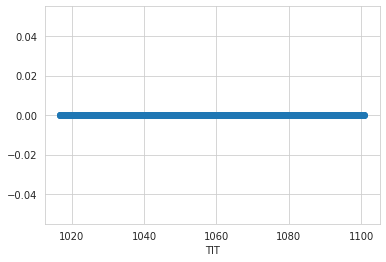


TAT



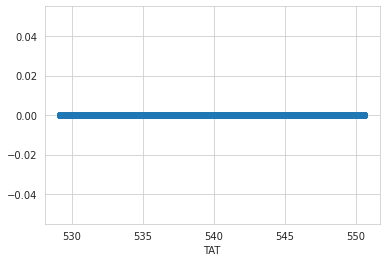


TEY



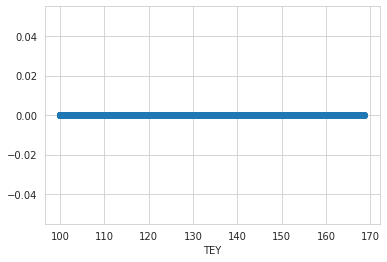


CDP



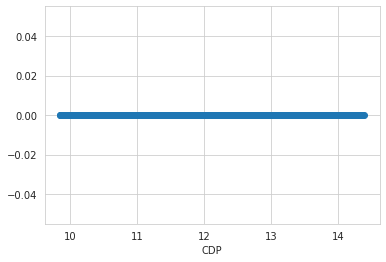

In [33]:
for feature in continuous_feature:
    print('\n'+feature+'\n')
    plt.plot(outlier_dataset[feature],np.zeros_like(outlier_dataset[feature]),'o')
    plt.xlabel(feature)
    plt.show()

In [35]:
outlier_dataset.to_csv('feature_engineered_data.csv',index=False)